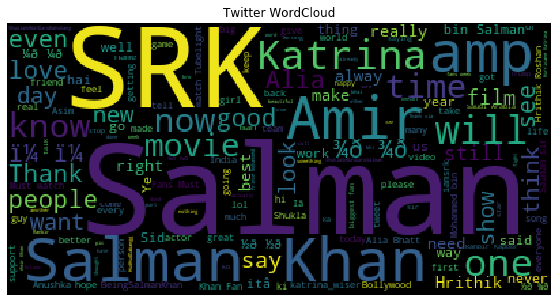

In [14]:
import numpy as np
import pandas as pd
import warnings
import re

#Visualisation
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


warnings.filterwarnings("ignore")
%matplotlib inline

import requests
furl = ' https://spotleai.sgp1.digitaloceanspaces.com/course/data/tweets_bollywood.txt'
response = requests.get(furl)
tweets = response.text.split("\n")

def word_cloud(tweets):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color="black", stopwords=stopwords, random_state = 2016).generate(" ".join([tw for tw in tweets]))
  plt.figure( figsize=(10,5), facecolor='white')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("Twitter WordCloud")
word_cloud(tweets)

In [15]:
import re
import pandas as pd

raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j) for j in [i for i in raw.split() if i.startswith("#")]]
df = pd.DataFrame({"hashtag": tags})
print(df['hashtag'].value_counts().head(5))

#BB13                     223
#BiggBoss13               196
#HudHudDabangg            174
#SalmanKhan               159
#ShuklaSeMatDaroSalman    142
Name: hashtag, dtype: int64


In [23]:
import spacy
nlp = spacy.load('en_core_web_sm')
orgs = []
for tw in tweets:
  doc = nlp(tw)
  tmp = [X.text for X in doc.ents if X.label_ == 'PERSON']
  orgs += tmp

orgs = [org for org in orgs if org in ['Alia Bhatt', 'Shah Rukh Khan', 'Salman Khan', 'Aamir Khan', 'Anushka Sharma', 'Ranbir Kapoor', 'Hrithik', 'Deepika Padukone','Katrina Kaif'

]]
df_org = pd.DataFrame({"celebs": orgs})
df_org['celebs'].value_counts()


Salman Khan         571
Alia Bhatt          118
Anushka Sharma       75
Katrina Kaif         55
Ranbir Kapoor        52
Hrithik              43
Shah Rukh Khan       33
Aamir Khan           14
Deepika Padukone      8
Name: celebs, dtype: int64

In [47]:
data = {"celebs":['Salman Khan', 'Alia Bhatt', 'Anushka Sharma','Katrina Kaif','Ranbir Kapoor','Hrithik','Shah Rukh Khan','Aamir Khan','Deepika Padukone'],

        "no_of_tweets":[571,118,75,55,52,43,33,14,8]}
voice= pd.DataFrame(data=data)
my_labels = voice['celebs']

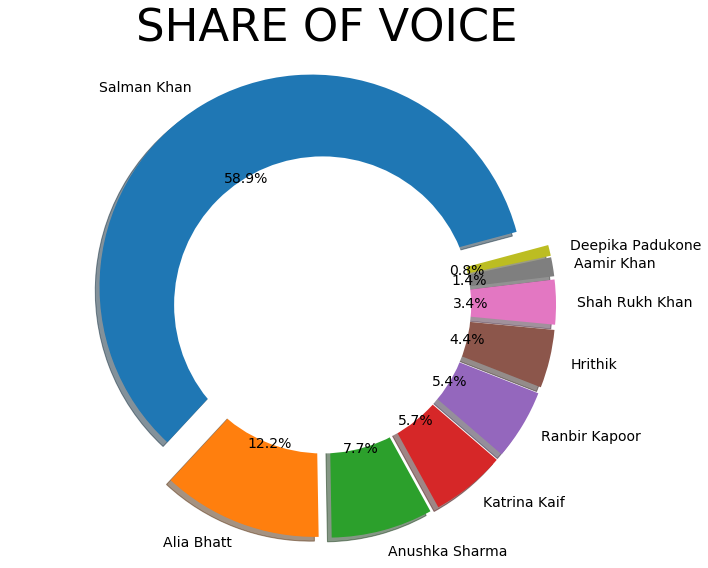

In [108]:
plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))
my_explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(voice['no_of_tweets'], labels=my_labels, autopct='%2.1f%%', startangle=15, shadow = True, explode=my_explode,textprops={'fontsize': 14})
plt.title('SHARE OF VOICE',{'fontsize':45})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

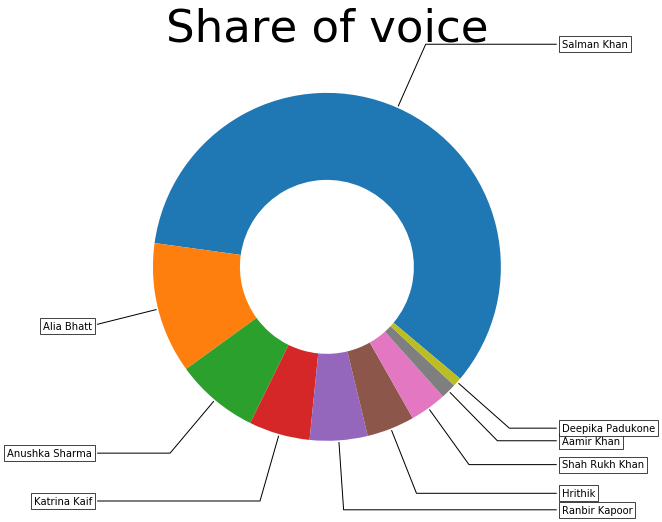

In [109]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))



wedges, texts = ax.pie(voice['no_of_tweets'], wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(voice['celebs'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Share of voice",{'fontsize':45})

plt.show()

In [75]:
df['hashtag'].value_counts().head(7)

#BB13                     223
#BiggBoss13               196
#HudHudDabangg            174
#SalmanKhan               159
#ShuklaSeMatDaroSalman    142
#SRK                      128
#Dabangg3                 112
Name: hashtag, dtype: int64

In [78]:
dataa = {'hashtag':['#BB13','#BiggBoss13','#HudHudDabangg','#SalmanKhan','#ShuklaSeMatDaroSalman','#SRK','#Dabangg3'],
        'no_of_hashtags': [223,196,174,159,142,128,112]}
Hashtags = pd.DataFrame(data=dataa)

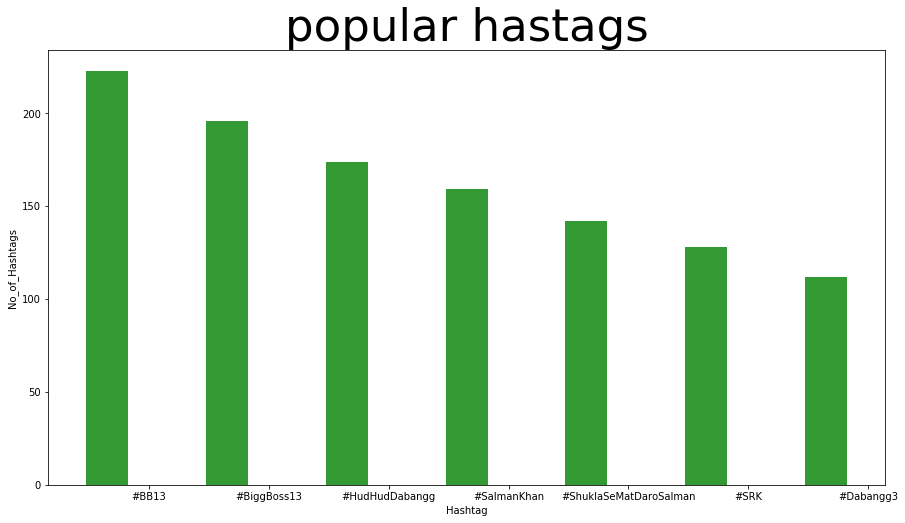

In [110]:
n_groups = 7
index = np.arange(n_groups)
fig, ax = plt.subplots(figsize=(15,8))
bar_width = 0.35
opacity = 0.8
plt.bar(index,Hashtags['no_of_hashtags'],bar_width,alpha=opacity,color='g')
plt.xlabel('Hashtag')
plt.ylabel('No_of_Hashtags')
plt.title('popular hastags',{'fontsize':45})
plt.xticks(index + bar_width,Hashtags['hashtag'])
plt.show()